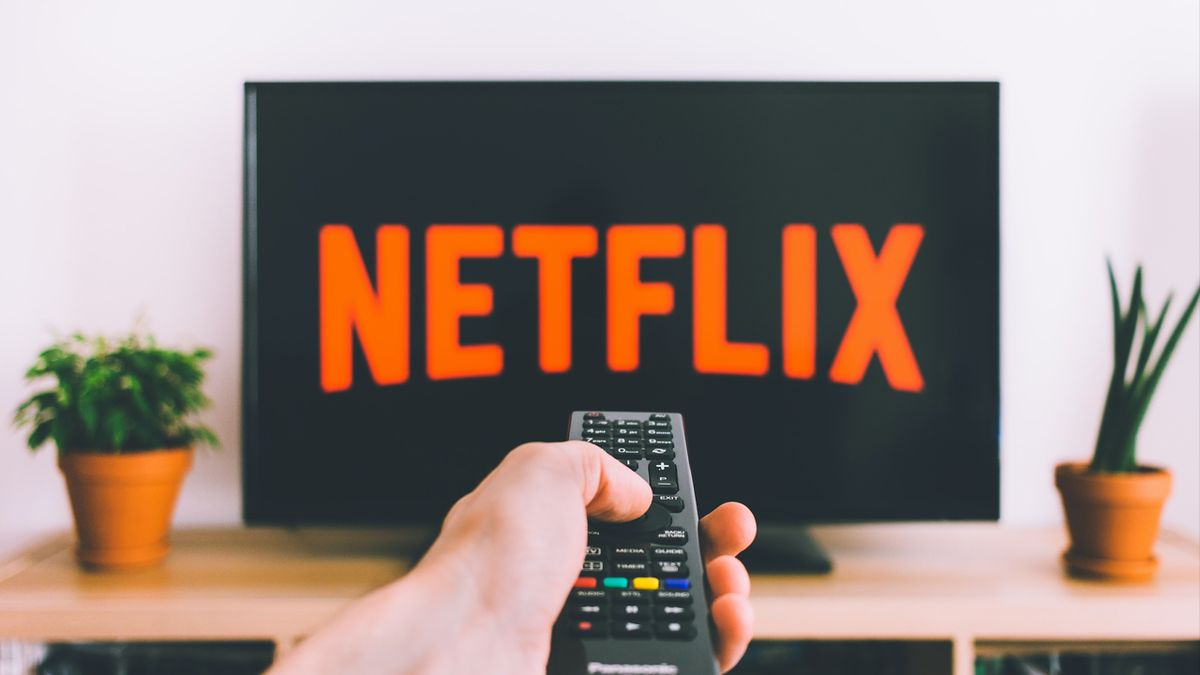

Image Credit : [FreeStocks](https://freestocks.org/photo/watching-netflix-on-tv/)

# **Beyond Binge Watching : Unwinding the Data Behind Netflix's Evolution**

In the ever-evolving landscape of entertainment, data science has emerged as a transformative force, revolutionising the way content is created, distributed, and consumed. [Netflix](https://www.linkedin.com/company/netflix/), a titan in the industry, has embraced data science to harness the vast trove of data it gathers on viewer preferences, habits, and overall content consumption.

By analysing this rich dataset, data scientists at Netflix can identify patterns, predict trends, and uncover hidden gems of knowledge. This deep understanding of user behaviour empowers Netflix to optimize its content recommendations, personalise user experiences, and enhance overall satisfaction. Netflix's success in [harnessing data science](https://medium.com/@anchaldigicrome/how-netflix-utilizes-data-science-to-enhance-viewer-experience-ecbfea940da5) is evident in its ability to maintain a loyal subscriber base and consistently deliver engaging content that captivates audiences worldwide.

In this data blog, we delve into a Netflix dataset from [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows). Our journey commences with an [exploratory data analysis](https://www.ibm.com/topics/exploratory-data-analysis), meticulously examining the dataset's variables and their relationships. Utilizing data visualization plots, we effectively present the data's essence, revealing hidden connections and patterns within the dataset.

Finally, we will conduct a [sentiment analysis](https://aws.amazon.com/what-is/sentiment-analysis/) of the descriptions using the VADER sentimental approach. This analysis aims to excavate the emotional undertones and sentiments expressed within the descriptions, classifying them as positive, negative, or neutral.

As data continues to grow exponentially, data science will undoubtedly play an even more pivotal role in shaping the future of the entertainment industry, driving innovation and redefining the way we consume and interact with content.

This blog has the following sections:

*   [Dataset Description](#Dataset-Description)
*   [Importing the Libraries](#Importing-the-libraries)
*   [Mounting drive and reading the file](#Mounting-drive-and-reading-the-file)
*   [Data Cleaning and Processing](#Data-Cleaning-and-Processing)
*   [Exploratory Data Analysis](#Exploratory-Data-Analysis)
*   [Sentimental Analysis](#Sentimental-Analysis)
*   [Conclusion](#Conclusion)
























##Dataset Description

The [dataset](#https://www.kaggle.com/datasets/shivamb/netflix-shows) has 8807 rows of Netflix movies and tv shows along with details such as - cast, directors, ratings, release year, duration, etc.



##Importing the libraries

In [87]:
#import drive
from google.colab import drive
#import pandas /matplotlib /seaborn /numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#libraries for sentimental analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

##Mounting drive and reading the file

In [88]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
df=pd.read_csv('/content/drive/MyDrive/UOL/NETFLIX.csv')

##Data Cleaning and Processing

We need to clean the data and process any errors or anomalies to improve the quality of our dataset.

In [90]:
#Display top 5 rows of the dataset to check if it has got right data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s160,Movie,Love in a Puff,Pang Ho-cheung,"Miriam Chin Wah Yeung, Shawn Yue, Singh Hartih...",Hong Kong,"September 1, 2021",2010,TV-MA,103 min,"Comedies, Dramas, International Movies",When the Hong Kong government enacts a ban on ...
1,s304,Movie,Esperando la carroza,Alejandro Doria,"Luis Brandoni, China Zorrilla, Antonio Gasalla...",Argentina,"August 5, 2021",1985,TV-MA,95 min,"Comedies, Cult Movies, International Movies",Cora has three sons and a daughter and she´s a...
2,s1271,TV Show,Sin senos sí hay paraíso,NaN,"Catherine Siachoque, Fabián Ríos, Carolina Gai...","United States, Colombia","February 25, 2021",2018,TV-MA,3 Seasons,"International TV Shows, Spanish-Language TV Sh...",Born into a small town controlled by the mafia...
3,s3963,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."
4,s3997,TV Show,Feb-09,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,"March 20, 2019",2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."


In [91]:
#to find the total number of rows in the dataframe. We have a total of 8807 rows of Netflix data
len(df)

8807

In [92]:
#to see the datatypes and the number of non-null rows for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [93]:
#count the number of null values in each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

We can see that director column has more number of null values. Other columns that have null values are cast,country,date_added,rating and duration.

In [94]:
#remove null values by dropping as these columns have very less number of null values
df = df.dropna(subset = ( 'rating','duration','date_added'))

To treat null values in country,cast and director columns, let's fill the null values as 'none' because deleting these rows entirely can significantly affects other columns due to the large number of null values present.

In [95]:
df['country']=df['country'].replace('','None')
df['cast']=df['cast'].replace('','None')
df['director']=df['director'].replace('','None')

<ipython-input-95-dc38fa0da715>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country']=df['country'].replace('','None')
<ipython-input-95-dc38fa0da715>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cast']=df['cast'].replace('','None')
<ipython-input-95-dc38fa0da715>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [96]:
#running this code again to see if null values are treated

df.isnull().sum()

show_id            0
type               0
title              0
director        2621
cast             825
country          829
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [97]:
df.nunique() #to find the number of unique values in each column

show_id         8790
type               2
title           8787
director        4526
cast            7678
country          748
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

Here, duplicates on most of the columns are fine except title column as we need unique titles, hence treating it.

In [98]:
## Remove duplicates keeping only the first occurance

df=df.drop_duplicates(subset=['title'])

In [99]:
#running this code again to see if title has unique values

df.nunique()

show_id         8787
type               2
title           8787
director        4526
cast            7678
country          748
date_added      1765
release_year      74
rating            14
duration         220
listed_in        513
description     8758
dtype: int64

In [100]:
len(df) #checking number of rows again

8787

Number of rows has been reduced after cleaning and processing the data and now the data is ready for analysis.

#Exploratory Data Analysis

###Analysis of Netflix content by type

To find the total number of movies and TV shows, we can filter out the rows of movies and TV shows separately to get the count.

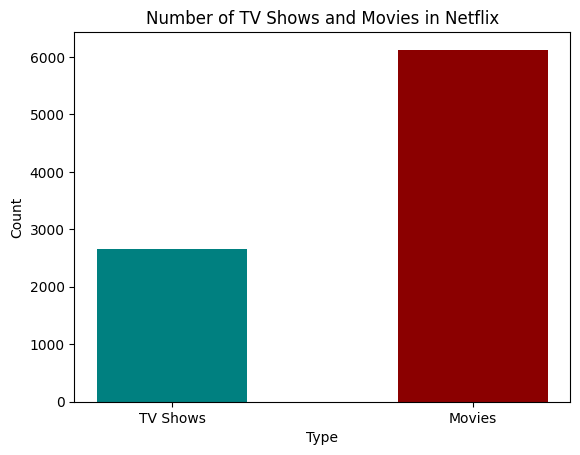

In [101]:
#filter out rows as TV show and Movie
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

# Get the number of movies and TV shows
tv_show_count = len(tv_shows)
movie_count = len(movies)

# Create a bar plot
color=['teal','darkred']
plt.bar(['TV Shows', 'Movies'], [tv_show_count, movie_count],color=color, width=0.5)
#labels for the axes
plt.xlabel('Type')
plt.ylabel('Count')
#to add a title
plt.title('Number of TV Shows and Movies in Netflix')
#show the plot
plt.show()

<a name="figure-1"></a>


---


**Figure 1**. Bar plot to visualise the type of Netflix content


---

From the bar plot, it is seen that Netflix has more movies than TV shows.This can be a strategy of Netflix to keep users engaged as movies are shorter but TV shows need more commitment from viewers.
[matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html) list of named colours is helpful to choose different colours for the plots throughout this blog.

To analyse Netflix content over the years, let's plot a histogram.

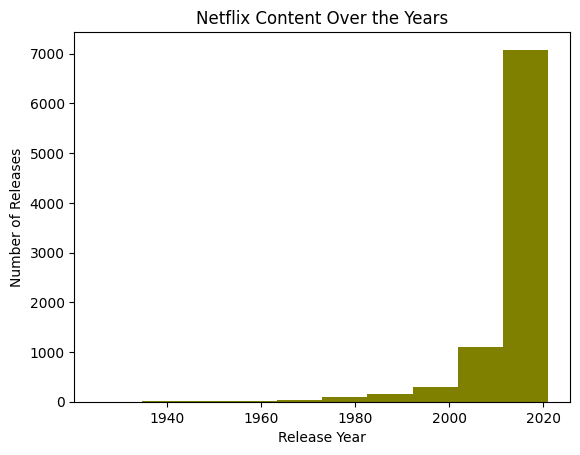

In [102]:
#to plot a histogram
plt.hist(df['release_year'],color='olive')
#rename the labels
plt.xlabel('Release Year')
plt.ylabel('Number of Releases')
#give a title
plt.title('Netflix Content Over the Years')
#show the plot
plt.show()

<a name="figure-1"></a>


---


**Figure 2**. Histogram showing distribution of Netflix content over the years (1900 to 2020)

---

We can see that number of movies or TV shows released in Netflix  has significantly increased over the years.There is a good increase after 2015.This increase has definitely impacted the way movies are made and distributed in the past decade.

To analyse the duration of movies and TV shows, we need to do a [processing](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html) on the duration column to remove the strings and convert it to int datatype.

In [103]:
#remove min
df['duration']=df['duration'].str.replace('min','')
#remove Seasons
df['duration']=df['duration'].str.replace('Seasons','')
#remove Season
df['duration']=df['duration'].str.replace('Season','')
#convert to int type
df['duration']=df['duration'].astype(str).astype(int)

We need to filter out the movies rows separately and used [tolist()](https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html) to collect the durations alone.

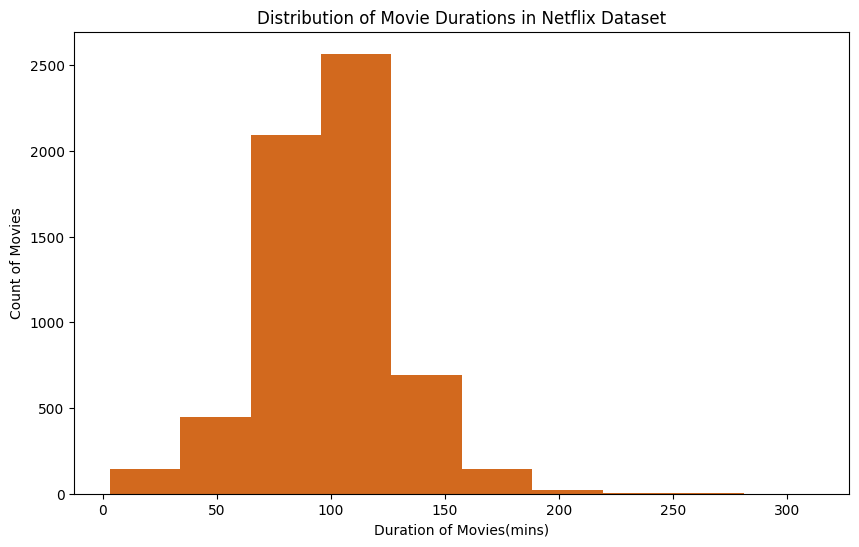

In [104]:
# Filter for movies
movies = df[df["type"] == "Movie"]
# Get the durations
movie_durations = movies["duration"].tolist()
# Create a histogram for movies
plt.figure(figsize=(10, 6))
plt.hist(movie_durations, bins=10,color='chocolate')
# Add labels and title
plt.xlabel("Duration of Movies(mins)")
plt.ylabel("Count of Movies")
plt.title("Distribution of Movie Durations in Netflix Dataset")
# Show the plot
plt.show()

<a name="figure-1"></a>


---


**Figure 3**. Histogram showing distribution of Movie duration in the Netflix content

---

From the histogram, it is seen that most of the movies are around 70-120 minutes.

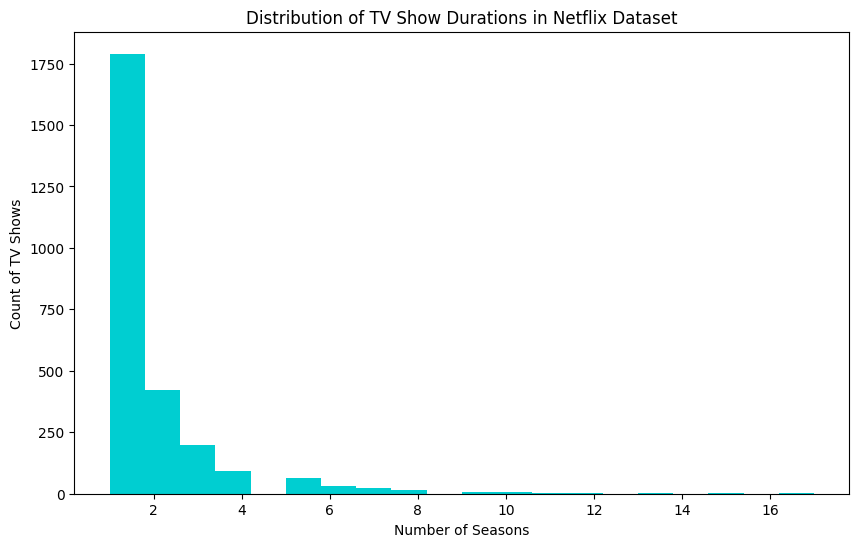

In [105]:
#filter for TV shows
tv_shows = df[df["type"] == "TV Show"]
#find the duration
tv_show_durations = tv_shows["duration"].tolist()
#plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(tv_show_durations, bins=20,color='darkturquoise')
#rename labels and add title
plt.xlabel("Number of Seasons")
plt.ylabel("Count of TV Shows")
plt.title("Distribution of TV Show Durations in Netflix Dataset")
#show the plot
plt.show()


<a name="figure-1"></a>


---


**Figure 4**. Histogram showing distribution of TV shows duration in the Netflix content

---

Here, bins have been adjusted to 20 to display a more precise plot as values are lesser. We can see that only few TV shows has more than 5 seasons and most of the TV shows have one to two seasons.

Netflix has got multiple ratings listed according to age groups.I created a dictionary to store the ratings and its corresponding count using for loop to traverse through the entire dataset.[.shape[ ]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html) can be used to count the number of rows as we iterate through the for loop

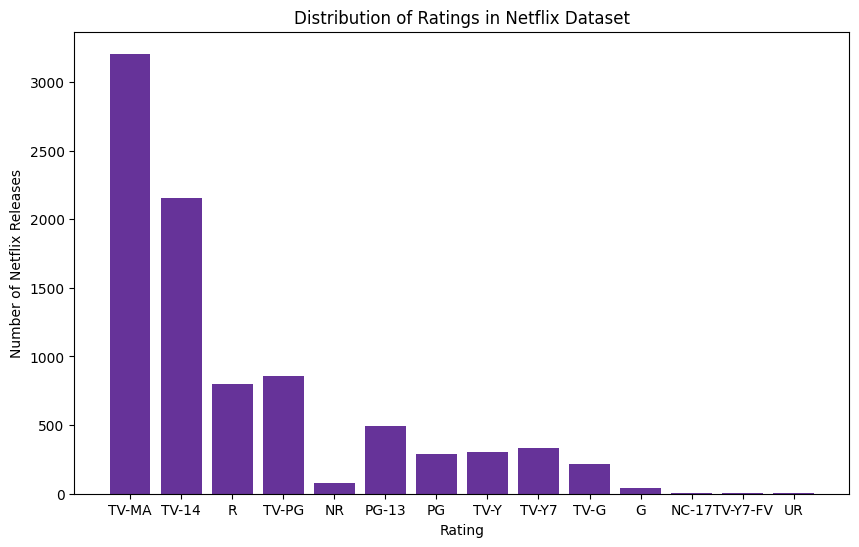

In [106]:
# select rows where rating is not equal to none
rating_df = df.loc[df['rating']!='none']

# Get the unique ratings in the dataset
unique_rating = rating_df['rating'].unique()

# Create a dictionary to store the frequency of each rating
ratings_frequency = {}
for rating in unique_rating:
    ratings_frequency[rating] = rating_df[rating_df['rating'] == rating].shape[0]

# Create a bar plot to visualize the distribution of ratings
plt.figure(figsize=(10,6))
plt.bar(unique_rating, ratings_frequency.values(),color='rebeccapurple')
plt.xlabel('Rating')
plt.ylabel('Number of Netflix Releases')
plt.title('Distribution of Ratings in Netflix Dataset')
plt.show()

<a name="figure-1"></a>


---


**Figure 5**. Bar plot showing unique ratings of Netflix along with its number of releases

---

 TV-MA has got more number of releases followed by TV-14.Both these ratings are not suitable for children to watch alone without [parental guidance](https://www.montanapbs.org/schedule/ratings-and-abbreviations/). Netflix can use this analysis for content selection according to age in the Netflix profiles.

Netflix has a wide variety of genres and let's do an analysis to find the most common genres of Netflix in our dataset.It should also be noted that genre column is a multiple value column separated by commas. To find the unique genres and the number of releases associated with each genre , [.explode()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html) is used to split the values and iterated through the for loop to store the number of releases for each genre.

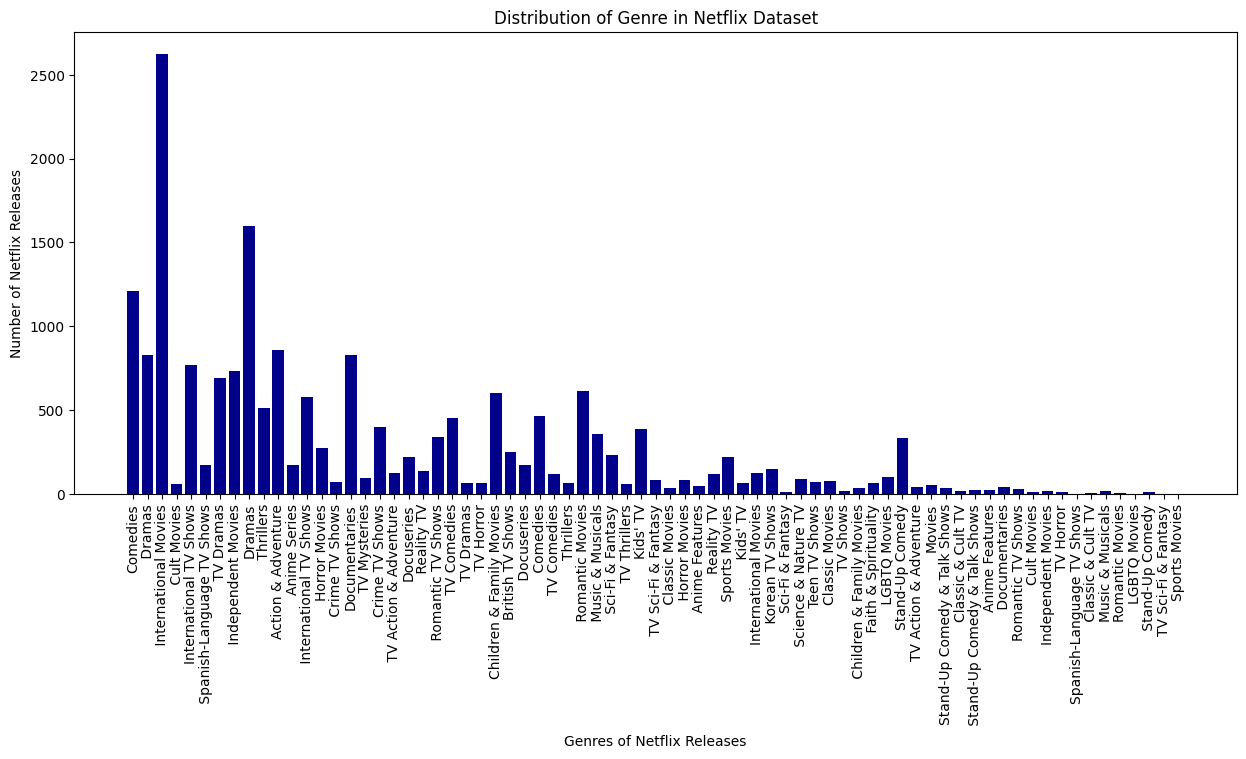

In [107]:
# extract the values to find the total genre list
genre_list =df["listed_in"].str.split(",").explode()
#forming a dataframe with genre alone for analysis
genre_list_df=pd.DataFrame(genre_list)
# Get the unique genre in the dataset
unique_genre = genre_list_df['listed_in'].unique()
#create dictionary to store unique genres
genre_frequency = {}
#for loop to iterate through the dataset
for genre in unique_genre:

    genre_frequency[genre] = genre_list_df[genre_list_df['listed_in'] == genre].shape[0]
# bar plot
plt.figure(figsize=(15,6))
plt.bar(unique_genre, genre_frequency.values(),color='darkblue')
#rename labels
plt.xlabel('Genres of Netflix Releases')
plt.ylabel('Number of Netflix Releases')
plt.xticks(rotation = 90) # to rotate the label names to 90 degrees for clear reading
#add title
plt.title('Distribution of Genre in Netflix Dataset')
#show the plot
plt.show()

<a name="figure-1"></a>


---


**Figure 6**. Bar plot to exhibit the unique genres along with the total number of releases for each genre.



---

International Movies is the highest found genre in Netflix movies/TV shows followed by Dramas. There is a smaller number of releases for LGBTQ, Sports and TV Sci-Fi & Fantasy genres. This type of analysis is used to recommend content according to interests chosen by subscribers.

Let's find the oldest and latest releases in Netflix, if it is a TV show or Movie along with its year and rating details.idxmax() and .idxmin() are used to find the largest and smallest values in the release_year column.

In [108]:
df_old = df.loc[df['release_year'].idxmin()]
df_latest=df.loc[df['release_year'].idxmax()]
print("The oldest release in Netflix is a",df_old['type'],"released in",df_old['release_year'],"and has got rating",df_old['rating'])
print("The latest release in Netflix is a",df_latest['type'],"released in",df_latest['release_year'],"and has got rating",df_latest['rating'])

The oldest release in Netflix is a TV Show released in 1925 and has got rating TV-14
The latest release in Netflix is a TV Show released in 2021 and has got rating TV-MA


Now,to find which month has got more releases over the years, .to_datetime functionality is used to convert to datetime and extracted month alone.Then, [.value_counts()](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) is used  to count the number of releases for respective months.

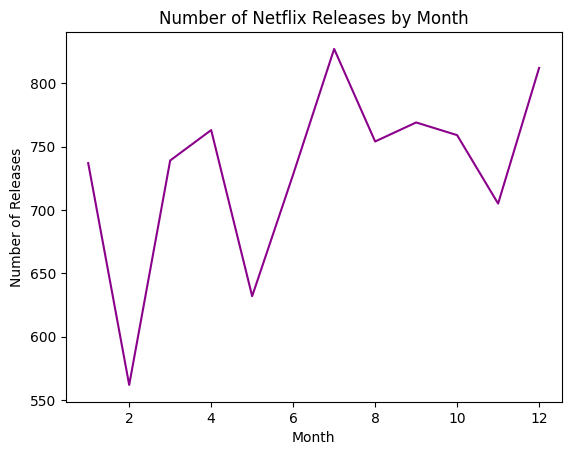

In [109]:
# to convert to datetime
df['date_added']=pd.to_datetime(df['date_added'],dayfirst=True)
#extract month
df['month']=df['date_added'].dt.month
# Count the number of shows released for each month
month_counts = df['month'].value_counts().sort_index()
# Plot the number of shows for each month
plt.plot(month_counts.index, month_counts.values,color='darkmagenta')
plt.xlabel('Month')
plt.ylabel('Number of Releases')
plt.title('Number of Netflix Releases by Month')
plt.show()

<a name="figure-1"></a>


---


**Figure 7**. Line plot to visualise which month has got the maximum releases across the overall Netflix content.



---

September and December have more number of releases over the years and February has the least number of releases next to May. Netflix can sell this data to productions to help them release in February or May for attracting more revenue.

Netflix have a lot of directors and let's do an analysis to find the top 10 directors along with the number of releases they have.

In [110]:
#split out directors using explode
directors =df["director"].str.split(",").explode()
#forming a dataframe with director alone for analysis
director_list=pd.DataFrame(directors)
director_list_df=director_list.loc[director_list['director']!='none']
# Get the unique directors in the dataset
director_counts = director_list_df['director'].value_counts().sort_values(ascending=False)
#display top 10 values from sorted dataframe
top_10_directors = director_counts.head(10)
print("The top 10 directors in Netflix are :")
top_10_directors

The top 10 directors in Netflix are :


Rajiv Chilaka          22
 Jan Suter             18
Raúl Campos            18
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Martin Scorsese        12
Jay Chapman            12
Youssef Chahine        12
Name: director, dtype: int64

Netflix can use this analysis to list releases according to director preferences by the viewers.

#Sentimental Analysis

Sentimental analysis is used to analyse emotions and sentiments expressed in texts.With respect to Netflix dataset, VADER sentimental analysis is used to differentiate the polarity of the descriptions as positive,negative and neutral.

In [111]:
#download vader lexicon
nltk.download('vader_lexicon')
#function to get the sentiment
def get_sentiment(text):
  return SentimentIntensityAnalyzer().polarity_scores(text)['compound']
# use the function on description column
df['sentiment']=df['description'].astype('str').apply(get_sentiment)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


 Sentiments are float values and it is rounded up to 2 decimal values using [round()](https://www.w3schools.com/python/ref_func_round.asp) to find the percentages.

In [112]:
#filter positive,negative and neutral sentiments
positive_scores = df.loc[df['sentiment']>0]
negative_scores = df.loc[df['sentiment']<0]
neutral_scores = df.loc[df['sentiment']==0]
#find percentages
positive_percentage=len(positive_scores)/len(df)*100
negative_percentage=len(negative_scores)/len(df)*100
neutral_percentage=len(neutral_scores)/len(df)*100
#print the percentages
print("The dataset has",round(positive_percentage,2),"% of positive descriptions" )
print("The dataset has",round(negative_percentage,2),"% of negative descriptions" )
print("The dataset has",round(neutral_percentage,2),"% of neutral descriptions" )

The dataset has 46.68 % of positive descriptions
The dataset has 43.7 % of negative descriptions
The dataset has 9.62 % of neutral descriptions


Given the small number of neutral sentiment descriptions and the relatively close proximity of positive and negative sentiment descriptions, we'll employ a histogram to visualize the sentiment distribution. To effectively differentiate between positive and negative sentiments, we'll exclude neutral sentiments from the histogram. This is because a single neutral value (0) could make the neutral bar the tallest, obscuring the relative magnitudes of positive and negative sentiments.Since the primary goal is to showcase the distribution of positive and negative sentiments, excluding neutral sentiments will provide a clearer picture.

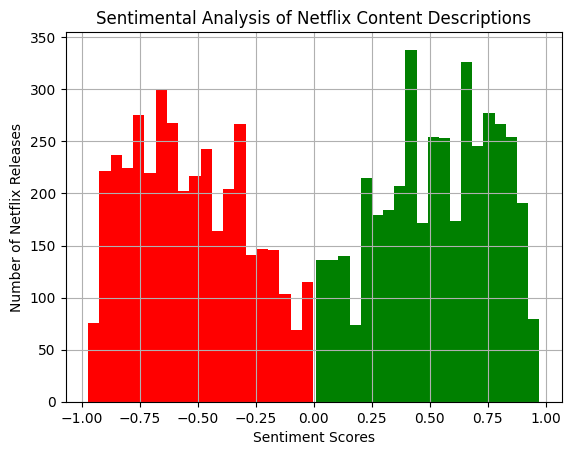

In [113]:
#histogram for positive and negative sentiments.
positive_scores['sentiment'].hist(color='green',bins=20)
negative_scores['sentiment'].hist(color='red',bins=20)
#rename labels and add title
plt.xlabel('Sentiment Scores')
plt.ylabel('Number of Netflix Releases')
plt.title('Sentimental Analysis of Netflix Content Descriptions')
#show the plot
plt.show()


<a name="figure-1"></a>


---


**Figure 8**. Histogram for Sentimental Analysis of Positive and Negative Descriptions within the Neflix Content



---

##Conclusion

Our in-depth analysis of the Netflix dataset has unveiled intriguing insights into the distribution of content across various categories, including type, genre, months of release, rating, duration, directors, and sentiment. Our findings indicate that Netflix boasts a larger collection of movies compared to TV shows, with International Movies emerging as the most prevalent genre. This observation aligns with a 2022 article published by the [Parrot Analytics](https://www.parrotanalytics.com/insights/netflix-is-a-powerhouse-for-foreign-language-content/) team, which highlights the growing popularity of foreign language films and TV shows across global audiences.
<p>
As research on Netflix continues, future endeavours could focus on identifying trends in content popularity over time and developing recommendation systems to tailor movie suggestions to individual preferences. Such advancements could further enhance the user experience and solidify Netflix's position as a leading provider of engaging entertainment.

##Bibliography

[1] *Watching Netflix on TV*.(n.d.).freestocks.org. https://freestocks.org/photo/watching-       netflix-on-tv/

[2] *Netflix*.(n.d.).linkedin.Retrieved December13,2023 from https://www.linkedin.com/company/netflix/

[3] shaina.(Oct 16).*How Netflix Utilizes Data Science to Enhance Viewer Experience*.Medium. https://medium.com/@anchaldigicrome/how-netflix-utilizes-data-science-to-enhance-viewer-experience-ecbfea940da5

[4] Bansal,S.(2021).*Netflix Movies and TV Shows*.Kaggle.Retrieved December 10,2023 from https://www.kaggle.com/datasets/shivamb/netflix-shows

[5] *What is Exploratory Data Analysis?*.(n.d.).IBM. https://www.ibm.com/topics/exploratory-data-analysis

[6] *What is Sentimental Analysis?*.(n.d.).aws. https://aws.amazon.com/what-is/sentiment-analysis/

[7] *List of named colors*.(n.d.).matplotlib. https://matplotlib.org/stable/gallery/color/named_colors.html

[8] *pandas.Series.str.replace*.(n.d.).pandas. https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html

[9] *pandas.Series.tolist*.(n.d.).pandas. https://pandas.pydata.org/docs/reference/api/pandas.Series.tolist.html

[10] *pandas.DataFrame.shape*.(n.d.).pandas. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

[11] *pandas.DataFrame.explode*.(n.d.).pandas. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html

[12] *pandas.Series.value_counts()*.(n.d.).pandas. https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

[13] *Python round() function*.(n.d.).w3schools. https://www.w3schools.com/python/ref_func_round.asp

[14] *Ratings and Abbreviations*.(n.d.).MTPBS. https://www.montanapbs.org/schedule/ratings-and-abbreviations/

[15] *Netflix is a powerhouse for Foreign-language content*.(November 23,2022).PARROT ANALYTICS.https://www.parrotanalytics.com/insights/netflix-is-a-powerhouse-for-foreign-language-content/










